# Evaluating a Model
<hr>

In practice, a typical workflow you'll go through when building neural networks is: 

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When evaluating a model, It is good to visualize:
- **The data:** what data are we working with? What does it look like?
- **The model itself:** what does the model look like?
- **The training of a model:** how does a model perform while it learns?
- **The prediction of the model:** how do the predictions of a model line up against the ground truth (the original labels)?

In [1]:
import tensorflow as tf

In [2]:
# make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [3]:
# make labels for the datasets
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

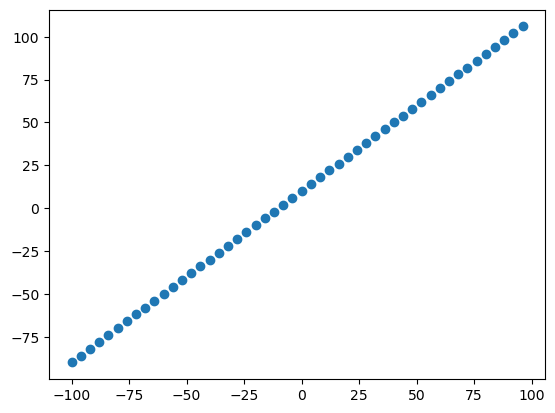

In [4]:
# visualize the data
import matplotlib.pyplot as plt

plt.scatter(X,y)

In [5]:
# split the data into train and test set
X_train = X[:40] # 80% 0f the data
y_train = y[:40]

X_test = X[40:] #20% of the data
y_test = y[40:]

### Visualize data

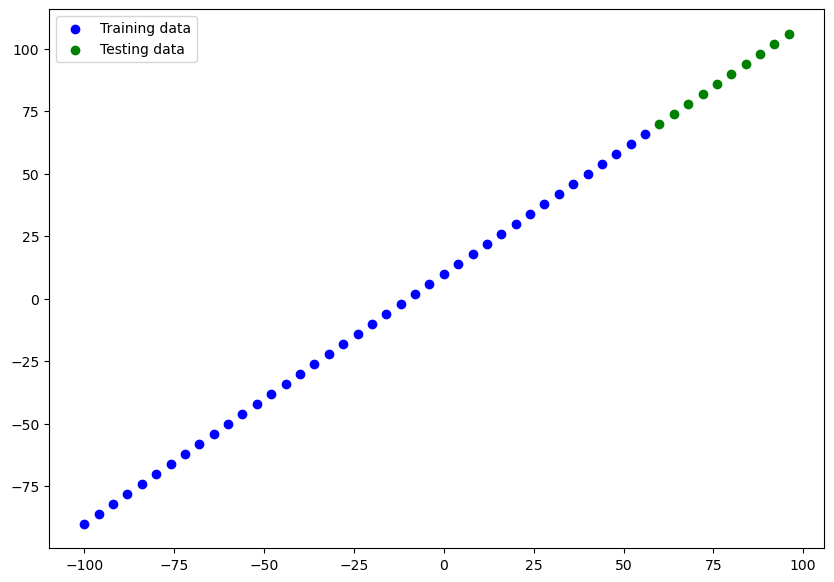

In [6]:
# visualize the data
plt.figure(figsize=(10,7))

# plot training data in blue
plt.scatter(X_train,y_train, c="b", label="Training data")

# plot test data in green
plt.scatter(X_test,y_test, c="g", label="Testing data")

# show legend
plt.legend();

In [8]:
# Build a neural network for the data
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,))
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# you don't fit the data before visualizing the model

### Visualize the model

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- **Total params:** total number of parameters in the model.
- **Trainable params:** these are the parameters (patterns) the model can update as it trains. 
- **Non-trainable params:** these parameters aren't updated during training (this is typical when you bring in already learn patterns from other model during **transfer learning**)
- Check *MIT's introduction to deep learning video* for more insight on total, trainable params.

In [10]:
# fit the model
model.fit(X_train, y_train, epochs=100, verbose=0)

In [11]:
# get summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Visualize model using plot

```py
from tensorflow.keras.utils import plot_model
```

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [13]:
#!pip install pydot

In [14]:
# plot_model(model=model, show_shapes=True)

In [19]:
# The model is built automatically by defining the input_shape
tf.random.set_seed(42)

# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# plot_model(model=model, show_shapes=True)

### Visualizing model's predictions

To visualize predictions, it is a good idea to plot them against the ground truth labels. Often you'll see it as `y_test` versus `y_pred`.

In [21]:
# make some predictions

y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 73ms/step


array([[56.547607],
       [60.31745 ],
       [64.08729 ],
       [67.85713 ],
       [71.62697 ],
       [75.396805],
       [79.16665 ],
       [82.93649 ],
       [86.70633 ],
       [90.47617 ]], dtype=float32)

In [22]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [ ]:
# visualize using a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred
                    ):
    """
    plot training data, test data and compares predictions to ground truth
    """
    plt.figure(figsize=(10,7))
    # plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # plot testing data in green